# Week 1
## Introduction
- Machine Learning is a subset of AI

### What is Machine Learning?
#### Definitions
- Machine Learning is a field of study that gives computers the ability to learn without being explicitly programmed. (Arthut Samuel - 1959)
- A computer program is said to learn from experience **E** with respect to some task **T** and some perfomance measure **P**, if its perfomance on **T**, as measured by **P**, improves with experience **E**. (Tom Mitchell - 1998)
    - **Example:**
        - **T:** Classifying emails as spam or ham
        - **E:** Watching you label emails as spam or ham
        - **P:** The fraction of emails correctly classified as spam/ham
        
#### Algorithm types:
- Supervised learning
- Unsupervised learning
- Others:
    - Reinforcement learning
    - Recommender Systems

### Supervised Learning
- **"Right answers" given**
- For a given feature (input data) set, we know the output (label)
- Using this known data, we try to predict the output for an unknown element

#### Regression
- Mapping input variables to continuous valued output (e.g. price)
- Example: Given a picture of a person, we have to predict their age on the basis of the given picture
- It's possible to turn a regression problem into a classification problem. For the above example e.g. is the person older or younger than 45
 
#### Classification
- Mapping input variables discrete valued output (e.g. 0, 1, 2 or 3)
- Example: Given a patient with a tumor, we have to predict whether the tumor is malignant or benign

### Unsupervised Learning
- Little or no idea what our results should look like (**no labels**)
- We derive structure from this data, based on relationships among the variables
- No feedback based on the prediction result, because we don't know the labels

#### Clustering
- Google News, e.g. groups many articles of many sites into groups (every group stands for a piece of news)

#### Non-clustering
- **"Cocktail Party Algorithm"** - allows you to find structure in a chaotic environment (e.g. identifying individual voices from mesh of sounds)

## Model and Cost Function
### Model Representation
#### Notation
- m = number of training examples
- x's = "input" variable / features
- y's = "output" variable / "target" variable
- (x,y) = one training example
- $(x^{(i)},y^{(i)})$ = i-th training example
- List of m training examples = training set
- X = space of input values
- Y = space of output values

#### Hypothesis
- Function **h** which maps from x's to y's
- The goal is, to make the function h a "good" predictor

#### Univariate Linear Regression
- Linear regression with one variable
- Hypothesis: $h_{\theta}(x) = \theta_0 + \theta_1x$

### Cost Function
#### How It Works?
- $\theta_{i's}$: Parameters
- Idea: Choose $\theta_0$, $\theta_1$ so that $h_{\theta}(x)$ is close to $y$ for our training examples $(x,y)$
- We are trying to make the difference between $h$ and $y$ very low: 
    - **Cost function:** $J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$
    - **Goal:** parameters $\theta_0$ and $\theta_1$, which will make the above cost function minimal (**minimizing function**)
    - Why $\frac{1}{2m}$? It's the same as $\frac{1}{2}\cdot\frac{1}{m}$
        - We are dividing with $m$ so we get the mean ($\overline x$)
        - The $\frac{1}{2}$ is a trick, so we get rid of the 2 which will get in front because of the power of 2, when we compute the partial derivatives
    - Why a **squared error** cost function instead of an absolute value or a mod function (or some other function)?
        - abs() function is not very mathematically efficient, does not emphasize the correction of large errors etc.
        - squared error can be computed very efficiently, partial derivative is continuous and easily computed
        
#### Example
The solution is $\theta_0=2$ and $\theta_1=3$, because we are generating the data for exactly this slope and y-intercept. This will be the minimal point in the 3D plot.

<IPython.core.display.Javascript object>


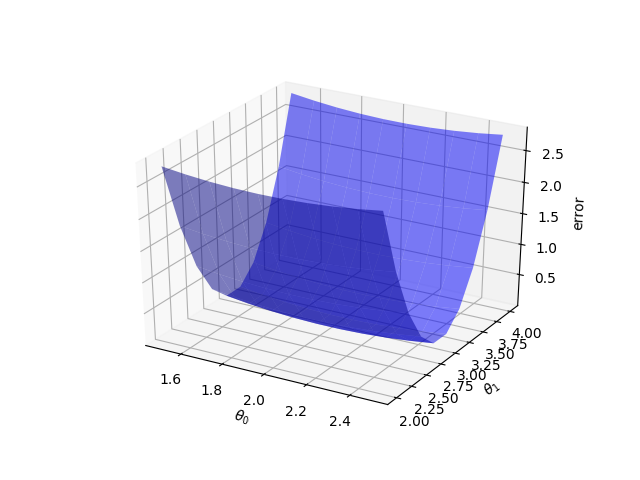

In [13]:
%matplotlib notebook

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def error(p0, p1, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (p0 + p1 * points[i].x)) ** 2
    return totalError / (float(len(points)) * 2)

x = np.arange(-4.0, 4.0, 0.05)
Point = collections.namedtuple('Point', ['x', 'y'])

# the solution (= point nearest to 0 and in this case equaling)
p0, p1 = 2, 3
points = [Point(xp, p1*xp+p0) for xp in x]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p0s = np.linspace(1.5, 2.5, 10)
p1s = np.linspace(2.0, 4.0, 10)

P0, P1 = np.meshgrid(p0s, p1s)
zs = np.array([error(p0p, p1p, points) 
               for p0p, p1p in zip(np.ravel(P0), np.ravel(P1))])
Z = zs.reshape(P1.shape)

ax.plot_surface(P0, P1, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('error')

plt.show()

#### Contour Plots
3D plots can also be represented as **contour plots**. Contour plots consist of multiple parallel plane "snapshots" at different heights. The most central point is the solution (in this case). Points on the same line, have an equal error value.

<IPython.core.display.Javascript object>


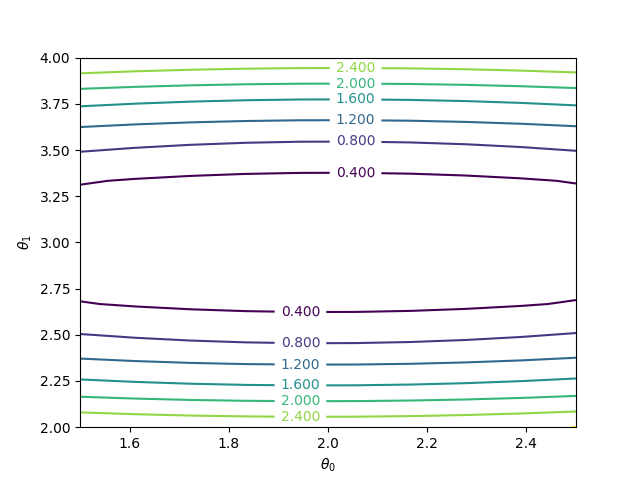

In [22]:
fig, ax = plt.subplots()
cs = ax.contour(P0, P1, Z)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.clabel(cs, inline=1)

plt.show()

If you still couldn't grasp how contour plots work, [here](https://www.youtube.com/watch?v=WsZj5Rb6do8) is a short video explaining it.

## Parameter Learning
### Gradient Descent
#### How It Works?
- Starting from a point on the surface of the 3D plot of a cost function (usually at $\theta_0 = 0$ and $\theta_1 = 0$), the gradient descent algorithm searchs for the next lowest point (imagine someone descending a mountain or a hill), and goes this way, until it eventually converges at a point
- Gradient descent can only find the **local optimum**, so different results can be expected depending on where you start
- $\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)$ where $j=0,1$
- Gets repeated until **convergence**
- $\alpha$ is the learning rate and $\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)$ is the partial derivative of $J(\theta_0,\theta_1)$
- $:=$ stands for an assignment, because it wouldn't be mathemtically correct to say e.g. $a=a+1$, thus you write $a:=a+1$
- $\theta_0$ and $\theta_1$ are set **simultaneously**, after they both got calculated, e.g. this would be a correct implementation:
$$temp_0 := \theta_0 - \alpha \frac{\partial}{\partial\theta_0}J(\theta_0,\theta_1)$$
$$temp_1 := \theta_1 - \alpha \frac{\partial}{\partial\theta_1}J(\theta_0,\theta_1)$$
$$\theta_0 := temp_0$$
$$\theta_1 := temp_1$$

#### Single Parameter Example
- An example for a single parameter $\theta_1 := \theta_1 - \alpha\frac{d}{d\theta_1}J(\theta_1)$
    - Depending of the point we choose, the slope of the **tangent** of this point (calculated using derivation) will be positive or negative
    - In case we already overshoot the minimum, the slope is positive, so subtracting this positive slope will lessen our $\theta_1$ parameter
    - In case our point is positioned before the minimum point, the slope is negative, so subtracting a negative number will increase the value of $\theta_1$ parameter
    
#### Impact of the Learning Factor $\alpha$:
- If $\alpha$ is too large, gradient descent can overshoot the minimum. It may fail to converge, or even diverge
- If $\alpha$ is too small, gradient descent can be slow
- How does gradient descent converge even with a fixed learning rate $\alpha$?
    - As we approach a local minimum, gradient descent will automatically take smaller steps, because the derived slope gets smaller as we progress
    
#### Linear Regression Application
- After the partial derivation, we get:
$$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x_i)-y_i)$$
$$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x_i)-y_i)x_i)$$
- This method looks at every example in the entire training set on every step, and is thus called **batch gradient descent**
- Because of the bowl-like form, the gradient descent always converges for linear regression problems (assuming the learning rate $\alpha$ is not too large) to the **global minimum** (there are no local minima)
- As we do this step for step, on the contour plot we are "moving" to the center 

## Linear Algebra Review
### Matrices and Vectors
#### Matrices
- Capital letters, e.g. A, B, C, X etc.
$$A=\begin{bmatrix}
1& 2& 3 \\
4& 5& 6
\end{bmatrix}$$
- This is an example of a $2\times 3$ Matrix, or $\mathbb{R}^{2\times 3}$ in this case
- $A_{13} = 3$ (first row, third column)
- In general, all the vectors and matrices will be 1-indexed (starting from 1 and not e.g. 0)
- **Scalar** means, that an object is a single value, not a vector or matrix

#### Vectors
$$b=\begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}$$
- Lowercase letters, e.g. a, b, c, x etc.
- This example is a 3-dimensional vector. In this case we could say it's $\mathbb{R}^3$
- $b_2=2$ (second row)

#### Octave/Matlab Commands
```
% this is a comment

% ; denotes we are going back to a new row

% matrix
A = [1, 2, 3; 4, 5, 6]

% vector
b = [1;2;3]

% m=4 and n=3
[m,n] = size(A)

% or save it to a single variable
dim_A = size(A)

% dim_b = 3 1
dim_b = size(b)

% el = 6
el = A(2,3)
```

### Addition and Scalar Multiplication
- You can only perform addition/subtraction on matrices of the same dimension
- Both are commutative
- Mutiple additions and scalar multiplications are performed in the order of the operation rule

#### Addition/Subtraction
$$
\begin{bmatrix}a& b \\ c& d\end{bmatrix} + \begin{bmatrix}w& x \\ y& z\end{bmatrix} = \begin{bmatrix}a+w& b+x \\ c+y& d+z\end{bmatrix} 
$$  
$$
\begin{bmatrix}a& b \\ c& d\end{bmatrix} - \begin{bmatrix}w& x \\ y& z\end{bmatrix} = \begin{bmatrix}a-w& b-x \\ c-y& d-z\end{bmatrix} 
$$

#### Scalar Multiplication/Division
$$
\begin{bmatrix}a& b \\ c& d\end{bmatrix} \times x = \begin{bmatrix}a\cdot x& b\cdot x \\ c\cdot x& d\cdot x\end{bmatrix} 
$$  
$$
\begin{bmatrix}a& b \\ c& d\end{bmatrix} \div x = \begin{bmatrix}a / x& b/x \\ c/x& d/x\end{bmatrix} 
$$

#### Octave/Matlab Commands
```
% Initialize matrix A and B 
A = [1, 2, 4; 5, 3, 2]
B = [1, 3, 4; 1, 1, 1]

% Initialize constant s 
s = 2

% addition
add_AB = A + B 

% subtraction
sub_AB = A - B

% scalar multiplication
mult_As = A * s

% scalar division
div_As = A / s

% Matrix + scalar -> add_As = [3, 4, 6; 7, 5, 4]
add_As = A + s
```

### Matrix Vector Multiplication
#### How It Works
$$
\begin{bmatrix}a& b \\c& d \\e& f \\ \end{bmatrix} \ast \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}a\ast x + b\ast y \\ c\ast x+d\ast y \\ e\ast x + f\ast y\end{bmatrix}
$$
- The number of columns of the matrix must equal the number of rows of the vector
- An **m x n matrix** multiplied by an **n x 1 vector** results in an **m x 1 vector**

#### Trick
- Can be used to **efficiently** make predictions
- Let's say out hypothesis function is: $h_{\theta}(x)=-40+0.25x$
- Additionally we want to predict the house prices for the following house sizes: 2104, 1416, 1534 and 852
- We will end out doing this:
$$\begin{bmatrix}1& 2104 \\ 1& 1416 \\ 1& 1534 \\ 1& 852\end{bmatrix} \ast \begin{bmatrix}-40 \\ 0.25\end{bmatrix}$$  
- The result will be a 4x1 matrix containing the predictions

#### Octave/Matlab Commands
```
% Initialize matrix A 
A = [1, 2, 3; 4, 5, 6;7, 8, 9] 

% Initialize vector v 
v = [1; 1; 1] 

% Multiply A * v
Av = A * v
```

### Matrix Matrix Multiplication
#### How It Works
- An **m x n matrix** multiplied by an **n x o matrix** results in an **m x o matrix**
- The number of columns of the first matrix must equal the number of rows of the second matrix
- The matrix vector multiplication trick from above, can also be used here to test multiple hypotheses  

$$
\begin{bmatrix}a& b \\c& d \\e& f \\ \end{bmatrix} \ast \begin{bmatrix}w& x \\ y& z\end{bmatrix} = \begin{bmatrix}a\ast w + b\ast y & a\ast x + b\ast z \\ c\ast w+d\ast y & c\ast x + d\ast z \\ e\ast w + f\ast y & e\ast x + f\ast z\end{bmatrix}
$$

#### Octave/Matlab Commands
```
% Initialize a 3 by 2 matrix 
A = [1, 2; 3, 4;5, 6]

% Initialize a 2 by 1 matrix 
B = [1; 2] 

% We expect a resulting matrix of (3 by 2)*(2 by 1) = (3 by 1) 
mult_AB = A*B

% Initialize a 2 by 2 identity matrix
I = eye(2)
```

#### Properties
- $A \times B \neq B \times A$ (**not commutative**)
- $A\times (B\times C) = (A\times B)\times C$ (**associative**)
- Idenity matrix simply has **1**'s on the diagonal (upper left to lower right diagonal) and **0**'s elsewhere
- The dimension of the identity matrix can be written as $I_{n\times n}$
- When multiplying the identity matrix **after** some matrix, the square identity matrix's dimension should match the other matrix's **columns**
- When multiplying the identity matrix **before** some other matrix, the square identity matrix's dimension should match the other matrix's **rows**
$$
\begin{bmatrix}1& 0\\ 0& 1\end{bmatrix}\ast \begin{bmatrix}1& 2& 3\\ 4& 5& 6\end{bmatrix} = \begin{bmatrix}1& 2& 3\\ 4& 5& 6\end{bmatrix} \ast \begin{bmatrix}1& 0& 0\\ 0& 1& 0 \\ 0& 0& 1\end{bmatrix}
$$

### Inverse and Transpose
#### Inverse
- Only **square** m x m matrices can have a inverse (but **not all**, e.g. matrices containing only 0's don't have one)
- Matrices that don't have an inverse are **singular** or **degenerate**
- A matrix multiplied by its inverse reults in the identity matrix
- $AA^{-1}=A^{-1}A=I$ (**commutative**)

#### Transpose
- The transposition of a matrix is like rotating the matrix 90° in clockwise direction and then reversing it
- $A^T_{ij}=A_{ji}$
$$
A=\begin{bmatrix}a& b \\ c& d\\ e& f\end{bmatrix}
$$  
$$
A^T=\begin{bmatrix}a& c& e \\ b& d& f\end{bmatrix}
$$

#### Octave/Matlab Commands
```
% Initialize matrix A 
A = [1,2,0;0,5,6;7,0,9]

% Transpose A 
A_trans = A' 

% or use this
A_trans = transpose(A)

% Take the inverse of A
A_inv = inv(A)

% Take the inverse of A (returns Moore-Penrose pseudo inverse)
A_inv = pinv(A)
```